<a href="https://colab.research.google.com/github/VolkovDmitr1y/1/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# работf с данными
import pandas as pd
import numpy as np

# эконометрические модели
import statsmodels.api as sms
import statsmodels.formula.api as smf

import scipy.stats as stats
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools
import statsmodels.stats.outliers_influence as oi

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# саммари-таблички
!pip install stargazer
from stargazer.stargazer import Stargazer, LineLocation

# для датасета
!pip install linearmodels

# графическое оформление
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

# предупреждения
import warnings
warnings.filterwarnings("ignore")

# графическое оформление
!pip install seaborn
import seaborn as sb


In [ ]:
# Данные взяты с Росстата

# ВРП- Валовой региональ- ный продукт в 2019 г. , млрд руб
# ИОК-инвестиции в основной капитал (в фактически действовавших ценах; миллионов рублей)
# ОРТ- оборот розничной торговли (в фактически действовавших ценах; рублей)
# СЧН-СРЕДНЕГОДОВАЯ ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ (оценка; тысяч человек)
# УЗН-уровень занятости населения (по данным выборочных обследований рабочей силы; в процентах)
# НИОКР-ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# РДН- РЕАЛЬНЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ (в процентах к предыдущему году)
# Н-ПОСТУПЛЕНИЕ НАЛОГОВ, СБОРОВ И ИНЫХ ОБЯЗАТЕЛЬНЫХ ПЛАТЕЖЕЙ (миллионов)
# ВСМ-СПЕЦИАЛИСТОВ, МАГИСТРОВ (человек) всего
# ГАТ	-ПЕРЕВОЗКИ ГРУЗОВ И ГРУЗООБОРОТ АВТОМОБИЛЬНОГО ТРАНСПОРТА
# ОВНИР	-ОРГАНИЗАЦИИ, ВЫПОЛНЯВШИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# ЭЗСНГ-суммарное количество объема экспорта в страны зарубежья и СНГ
# ОРС- ОБЪЕМ РАБОТ, ВЫПОЛНЕННЫХ ПО ВИДУ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ «СТРОИТЕЛЬСТВО» (в фактически действовавших ценах; миллионов рублей)
# ФКП-ФАКТИЧЕСКОЕ КОНЕЧНОЕ потреблениеНА ТЕРРИТОРИИ СУБЪЕКТОВ (в текущих рыночных ценах; расходы домохозяйств , социальных трансфертов в
# ВС-ВЫПУСК СПЕЦИАЛИСТОВ (тысяч)
# ОГЖ-ОТПРАВЛЕНИЕ ГРУЗОВ ЖЕЛЕЗНОДОРОЖНЫМ ТРАНСПОРТОМ ОБЩЕГО ПОЛЬЗОВАНИЯ
# ЗК-ЗАБОЛЕВАЕМОСТЬ на 1000 человек населения ПО ОСНОВНЫМ КЛАССАМ (болезни имунной системы (нарушение кровообращения))
# ВРПД-Валовой региональ- ный продукт на душу населения
# ЧСПБС-2019/2020 Студенты органи- заций – всего 5.15. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ
# (на начало учебного года; тысяч человек)
# ПОПБС-ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, (тысяч Принято на обу- чение
# в организации – всего человек) МАГИСТРАТУРЫ
# СДДНМ-. СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ(в месяц; рублей)
# РР-РАСПРЕДЕЛЕНИЕ СТРОИТЕЛЬНЫХ РАБОТ, ВЫПОЛНЕННЫХ ОРГАНИЗАЦИЯМИ (в процентах) РАЗЛИЧНЫХ ФОРМ СОБСТВЕННОСТИ  частнаяская
# СИОКЗ-СТРУКТУРА ИНВЕСТИЦИЙ В ОСНОВНОЙ КАПИТАЛ ПО ВИДАМ ОСНОВНЫХ  ФОНДОВ (в процентах от общего объема инвестиций) 2019 З дания  (кроме жилых) и сооружения, расходы
# ВЮФЛ- ВКЛАДЫ (ДЕПОЗИТЫ) ЮРИДИЧЕСКИХ И ФИЗИЧЕСКИХ ЛИЦ В РУБЛЯХ,  (исходя из места привлечения средств; на начало года; миллионов рублей) ПРИВЛЕЧЕННЫЕ КРЕДИТНЫМИ ОРГАНИЗАЦИЯМИ
# ИППТ- ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
# ЗИДО-ЗАТРАТЫ НА ИННОВАЦИОННУЮ ДЕЯТЕЛЬНОСТЬ ОРГАНИЗАЦИЙ в 2019 г. Млн руб.
# NX-ТОВАРНАЯ СТРУКТУРА ЭКСПОРТА И ИМПОРТА в 2019 г. Чистый экспорт
# ИТГП-ИНДЕКСЫ ТАРИФОВ НА ГРУЗОВЫЕ ПЕРЕВОЗКИ (декабрь к декабрю предыдущего года; в процентах)
# ЖФ- ЖИЛИЩНЫЙ ФОНД1) (общая площадь жилых помещений; миллионов
# ЧПО-ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ1)(на конец года)
# ООЭД-ОБОРОТ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ в 2019 г. 1) (миллиардов рублей) обрабатыва ющие производств а
# ОКУ-ОБЪЕМ КОММУНАЛЬНЫХ УСЛУГ НАСЕЛЕНИЮ (миллионов рублей)


In [ ]:
data = pd.read_excel("/content/данныеРосстат.xlsx", header = 0)
data.head()

,область,ВРП,ИОК,НИОКР,УЗН,З1000,СЧН,РДН,Н,ОРТ,...,ЗК,ВРПД,ЧСПБС,ПОПБС,СДДН(М),РСРО,СИОК(З),ВЮФЛ,ИППТ,ЗИДО
0,Белгородская область,956.0,167367,2631.6,80.5,694.5,1548.3,100.6,123934.4,357195,...,2.1,617426.5,46800,12200,32352,97.2,33.9,241282,2536,30653.0
1,Брянская область,397.7,63944,666.1,77.9,760.4,1196.3,100.5,53930.2,270155,...,2.0,332442.8,23700,5800,28371,90.5,36.8,114128,2064,2200.8
2,Владимирская область,537.4,90085,5496.6,81.8,895.2,1362.1,101.9,84710.5,238711,...,2.1,394560.3,26400,8000,25358,93.7,34.9,192945,7640,14058.5
3,Воронежская область,1002.6,298024,9656.5,78.0,524.5,2326.0,101.1,128249.4,585880,...,2.3,431037.0,85100,23500,32022,95.5,47.9,368532,2795,22435.0
4,Ивановская область,249.8,37992,865.6,80.0,931.1,1000.7,99.5,33519.3,178635,...,1.8,249591.6,24700,6500,25794,97.4,28.5,119972,1161,195.3


In [ ]:
data.columns

Index(['область', 'ВРП', 'ИОК', 'НИОКР', 'УЗН', 'З1000', 'СЧН', 'РДН', 'Н',
       'ОРТ', 'ГАТ', 'ОВНИР', 'ЭЗСНГ', 'ОРС', 'ФКП', 'ВС', 'ОГЖ', 'ЗК', 'ВРПД',
       'ЧСПБС', 'ПОПБС', ' СДДН(М)', ' РСРО', ' СИОК(З)', ' ВЮФЛ', ' ИППТ',
       'ЗИДО'],
      dtype='object')

In [ ]:
# для удаления пробелов в названиях столбцов

data.columns = map(lambda x: x.strip(), list(data.columns))

In [ ]:
data.columns

Index(['область', 'ВРП', 'ИОК', 'НИОКР', 'УЗН', 'З1000', 'СЧН', 'РДН', 'Н',
       'ОРТ', 'ГАТ', 'ОВНИР', 'ЭЗСНГ', 'ОРС', 'ФКП', 'ВС', 'ОГЖ', 'ЗК', 'ВРПД',
       'ЧСПБС', 'ПОПБС', 'СДДН(М)', 'РСРО', 'СИОК(З)', 'ВЮФЛ', 'ИППТ', 'ЗИДО'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data['СДДНМ2']=np.log(data['СДДН(М)'])
data['ЗИДО']=np.log(data['ЗИДО'])
data['Log(ВРП)'] = np.log(data['ВРП'])

Y=data['Log(ВРП)']
X=data[['ГАТ','СДДНМ2','РДН']]
model1=sm.OLS(Y,sm.add_constant(X)).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Log(ВРП)   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     43.68
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           6.82e-17
Time:                        16:44:37   Log-Likelihood:                -86.661
No. Observations:                  85   AIC:                             181.3
Df Residuals:                      81   BIC:                             191.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0628      5.024     -1.804      0.0

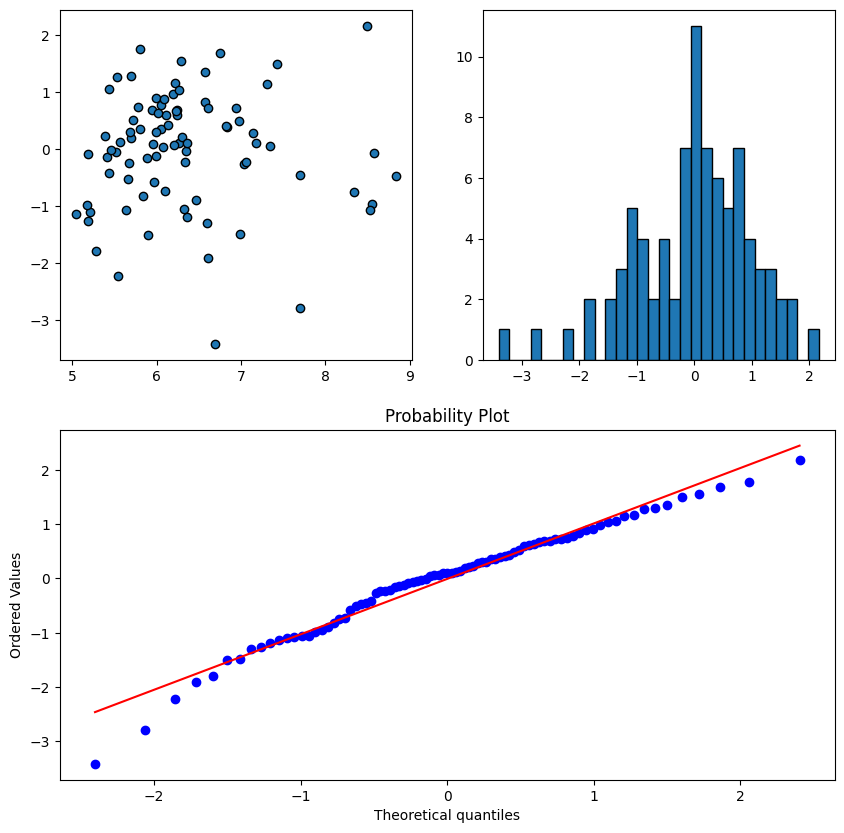

In [ ]:
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model1.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model1.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:
# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model1.resid, exog_het = sm.add_constant(X))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0         8.297        0.04    2.921       0.039


In [ ]:

# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]

norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model1.resid)[1],
    sm_diagnostic.kstest_normal(x = model1.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model1.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

    p_value                Test
0  0.117681    Anderson-Darling
1  0.114627  Kolmogorov-Smirnov
2  0.033435         Jarque-Bera


In [ ]:
#VIF-тест
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

,0
ГАТ,2.174909
СДДНМ2,1091.791221
РДН,1077.136166


In [ ]:
#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model1.resid,exog_het=sm.add_constant(X))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

[('Lagrange multiplier statistic', 8.297294221737351),
 ('p-value', 0.04025096036315972),
 ('f-value ', 2.9207176163320847),
 ('f p-value', 0.03894394890071782)]

In [ ]:
#Тестирование на пропущенную нелинейность(Тест Рейнбоу)
data_rain = data.iloc[np.argsort(data["Log(ВРП)"]), :]
factors_rain = data_rain[['Log(ВРП)','ГАТ','СДДНМ2','РДН']]
wage_rain = data_rain['Log(ВРП)']

res_rain = sm.OLS(wage_rain, factors_rain).fit()
rain_t1 = sm_diagnostic.linear_rainbow(res_rain)
print(pd.DataFrame(rain_t1, index = ["F-stat", "p-value"]).T)



        F-stat       p-value
0  6848.412145  1.205418e-63


In [ ]:
#Тестирование на пропущенную нелинейность
factors_nosq = data[['ГАТ','СДДНМ2','РДН']]

wage = data['Log(ВРП)']
res_nosq = sm.OLS(wage, factors_nosq).fit()

reset_t2 = oi.reset_ramsey(res_nosq, degree = 2)
print(reset_t2)


<F test: F=0.5359743689569721, p=0.4662189196494112, df_denom=81, df_num=1>


In [ ]:
# Модель 2

In [ ]:
data = data.drop('область', axis = 1)

In [ ]:
data = data.fillna(data.median())

In [ ]:

data['ВСМ2']=np.log(data['ВС'])


Y=data['Log(ВРП)']
X2=data[['ВСМ2']]
model2=sm.OLS(Y,sm.add_constant(X2)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Log(ВРП)   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.73e-16
Time:                        16:44:58   Log-Likelihood:                -93.061
No. Observations:                  85   AIC:                             190.1
Df Residuals:                      83   BIC:                             195.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1355      0.142     36.150      0.0

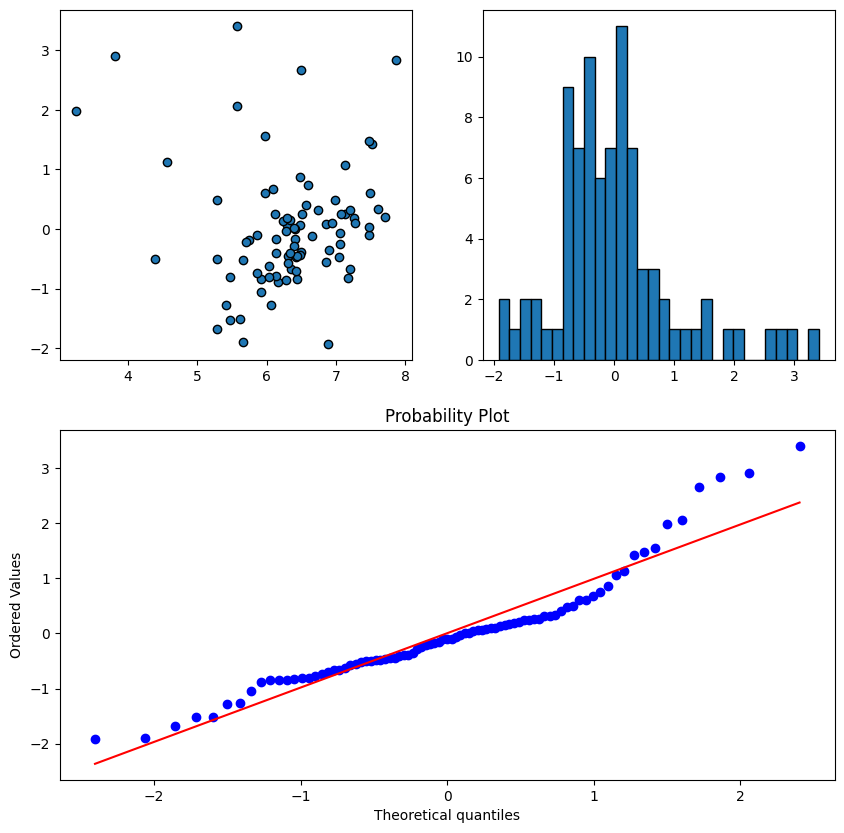

In [ ]:

# для модели 2
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model2.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model2.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:
# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model2.resid, exog_het = sm.add_constant(X2))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0         5.835       0.016    6.118       0.015


In [ ]:

# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]
norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model2.resid)[1],
    sm_diagnostic.kstest_normal(x = model2.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model2.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

        p_value                Test
0  2.304296e-05    Anderson-Darling
1  1.000000e-03  Kolmogorov-Smirnov
2  6.099385e-07         Jarque-Bera


In [ ]:
#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model2.resid,exog_het=sm.add_constant(X2))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

[('Lagrange multiplier statistic', 5.834884808816366),
 ('p-value', 0.015711438356355613),
 ('f-value ', 6.117535962174569),
 ('f p-value', 0.015424264164738246)]

In [ ]:

data['ИОК2']=np.log(data['ИОК'])

Y=data['Log(ВРП)']
X3=data[['ИОК2']]
model3=sm.OLS(Y,sm.add_constant(X3)).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Log(ВРП)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     938.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           5.20e-47
Time:                        16:45:11   Log-Likelihood:                -20.871
No. Observations:                  85   AIC:                             45.74
Df Residuals:                      83   BIC:                             50.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0875      0.374    -13.587      0.0

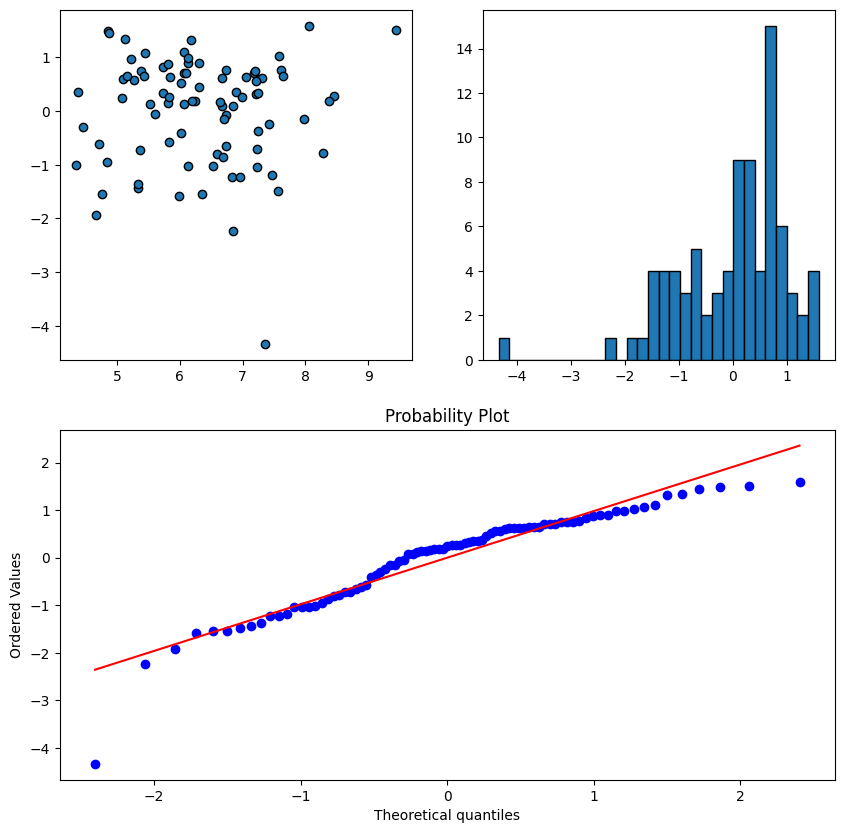

In [ ]:

# для модели 2
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model3.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model3.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:

# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model3.resid, exog_het = sm.add_constant(X3))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0         0.357        0.55     0.35       0.556


In [ ]:

# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]
norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model3.resid)[1],
    sm_diagnostic.kstest_normal(x = model3.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model3.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

        p_value                Test
0  3.364884e-04    Anderson-Darling
1  1.000000e-03  Kolmogorov-Smirnov
2  3.419928e-10         Jarque-Bera


In [ ]:

#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model3.resid,exog_het=sm.add_constant(X3))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

[('Lagrange multiplier statistic', 0.35674474381455434),
 ('p-value', 0.5503197032705198),
 ('f-value ', 0.3498189388745683),
 ('f p-value', 0.5558231169345325)]

In [ ]:
# Общие результаты


In [ ]:
Stargazer([model1, model2,model3])

In [ ]:
# Обучение модели

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.shape

(85, 31)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( data[['ИОК2']],
                                                    data['Log(ВРП)'], test_size=0.5, random_state=85)

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([7.43350288, 5.31549974, 5.42308809, 7.06669468, 5.58947301,
       6.17137097, 6.67982119, 6.24484175, 6.30795368, 4.82768883,
       8.007215  , 6.74523331, 6.70004208, 7.65773206, 6.19592003,
       6.12262985, 5.72311839, 6.12802124, 6.0196999 , 6.02445679,
       5.2071557 , 7.2251806 , 6.60083767, 9.48853869, 5.44216135,
       4.69177448, 7.24822094, 7.37887773, 7.21324796, 5.5218043 ,
       6.06279036, 6.53385883, 7.49228505, 5.36902666, 6.06653464,
       4.43853681, 6.64123269, 6.67667015, 8.30434281, 5.14817792,
       5.82863683, 6.90966555, 6.74887896])

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
test_residuals = y_test - test_predictions

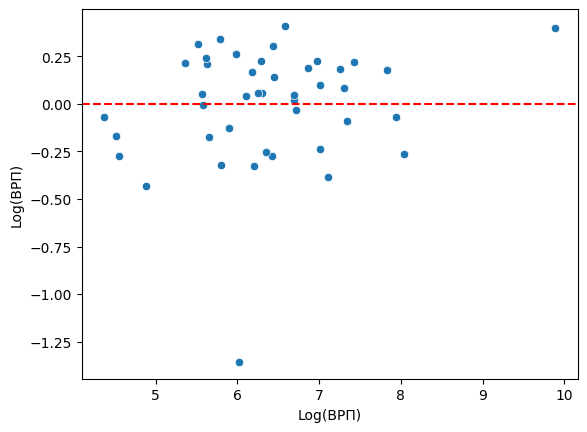

In [ ]:
# график остатков
sns.scatterplot( x = y_test, y = test_residuals)
plt.axhline( y = 0, color = 'r', ls = '--')

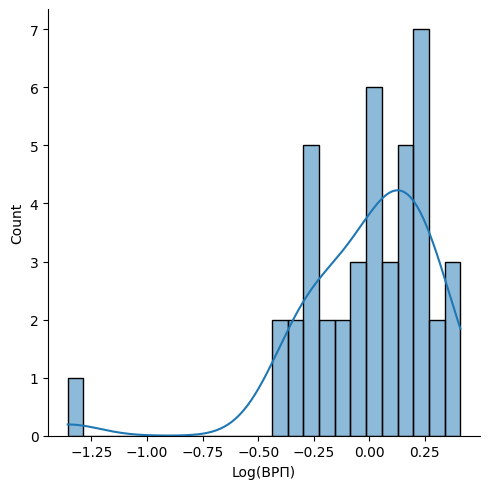

In [ ]:
# распределение остатков
sns.displot(test_residuals, bins = 25, kde = True)

In [ ]:
import scipy as sp

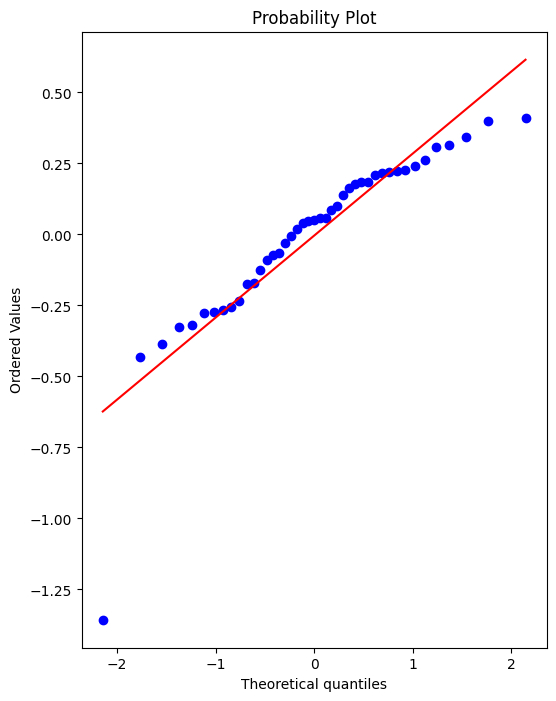

In [ ]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [ ]:
final_model = LinearRegression()

In [ ]:
X = data[['ИОК2']]
y = data['Log(ВРП)']

final_model.fit(X, y)


LinearRegression()

In [ ]:
final_model.coef_

array([0.97750911])

In [ ]:
y_hat = final_model.predict(X)

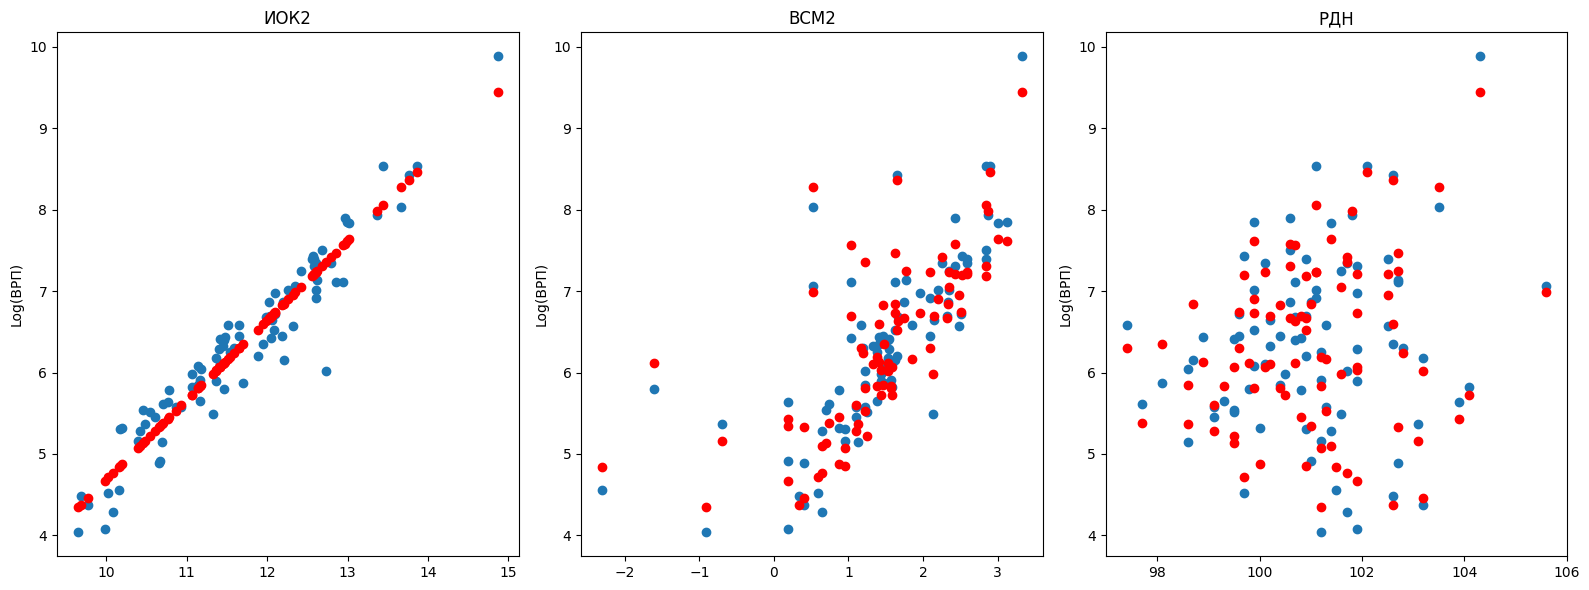

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(data['ИОК2'],data['Log(ВРП)'],'o')
axes[0].plot(data['ИОК2'],y_hat,'o',color='red')
axes[0].set_ylabel("Log(ВРП)")
axes[0].set_title("ИОК2")

axes[1].plot(data['ВСМ2'],data['Log(ВРП)'],'o')
axes[1].plot(data['ВСМ2'],y_hat,'o',color='red')
axes[1].set_title("ВСМ2")
axes[1].set_ylabel("Log(ВРП)")

axes[2].plot(data['РДН'],data['Log(ВРП)'],'o')
axes[2].plot(data['РДН'],y_hat,'o',color='red')
axes[2].set_title("РДН");
axes[2].set_ylabel("Log(ВРП)")
plt.tight_layout();
